# PA 2: Classification - Decision Tree

## Student Details
Student Name and ID: Avinash Shanker  1001668570


Notes: When submitting, fill your name and ID in this cell.  [1 point]


Do not to forget to cite any external sources used by you.

## Programming Assignment Submission Instructions


Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName_Option2'  [1 point]


## Programming Assignment Details

This is an individual assignment. 

For this assignment use Jupyter notebook, Panda, and scikit.

- Load wine dataset from sklearn datasets.  [2 points]
- Create a dataframe and print the first and last five records of your dataset.  [2 points]
- Print the class names.  [2 points]
- Split your dataset 70% for training, and 30% for testing the classifier.  [2 points]
- Use gini and entropy to measure the quality of a split.  [5 points]
- Use comments to explain your code and variable names. [2 points]
- Calculate and print the confusion matrix, and the classification Report (includes: precision, recall, f1-score, and support).  [5 points]
- Print the decision tree visualization.  [5 points]

## Report

For each classification task you need to submit a report (Microsoft Word, or PDF) that you have to:
- describe the Decision Tree method,  [5 points]
- the dataset and if you have done any pre-process, and [5 points]
- your code. [2 points]
- Visualization of the decision tree for gini and entropy.[8 points]
- Interpret your results, and do not forget to compare gini and entropy [10 points]

Do not to forget to cite your sources!


Step 3: Save your report file as 'yourLastName_Last4digitsofyourID_DT.doc'  [1 point]

Step 4: Place this file inside the folder 'PA#2_Classification_yourLastName_Option1'  [1 point]

# - - - - - - - - - - - - - - - Solution - - - - - - - - - - - - - - - - - - 

In [1]:
#Below are References used
#http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report
#https://en.wikipedia.org/wiki/Precision_and_recall
#https://datascience.stackexchange.com/questions/10228/gini-impurity-vs-entropy
#http://scikit-learn.org/stable/modules/tree.html
#http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
#https://www.kaggle.com/tags/decision-tree

In [2]:
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
#Loading wine dataset into notebook
from sklearn.datasets import load_wine
from sklearn import tree
Wine_Loaded = load_wine()

In [4]:
#Creating a dataframe called wine_data
features = pd.DataFrame(data=Wine_Loaded['data'],columns=Wine_Loaded['feature_names'])
wine_data = features
wine_data['target']=Wine_Loaded['target']
wine_data['class']=wine_data['target'].map(lambda ind: Wine_Loaded['target_names'][ind])

In [5]:
#Printing first 5 and last 5 rows
wine_data.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


In [6]:
wine_data.tail(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2,class_2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2,class_2


In [7]:
#Preprocessing: Checking if my dataset contain duplicated values and found no duplicates
extra = wine_data[wine_data.duplicated()]
extra.shape

(0, 15)

In [8]:
#Preprocessing: Checking if my dataset contain Null values and found no Null
#printing the Class Names
print("Printing Class names and checking if they have NULL data\n\n\n",wine_data.isnull().sum())

Printing Class names and checking if they have NULL data


 alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
class                           0
dtype: int64


In [9]:
#Splitting My dataset into 70% training and 30% Test
#data_train, data_test, label_train, label_test are training and testing vaiables
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(Wine_Loaded['data'],Wine_Loaded['target'],test_size=0.3)
print(len(data_train),' samples in training data\n',
      len(data_test),' samples in test data\n', )

124  samples in training data
 54  samples in test data



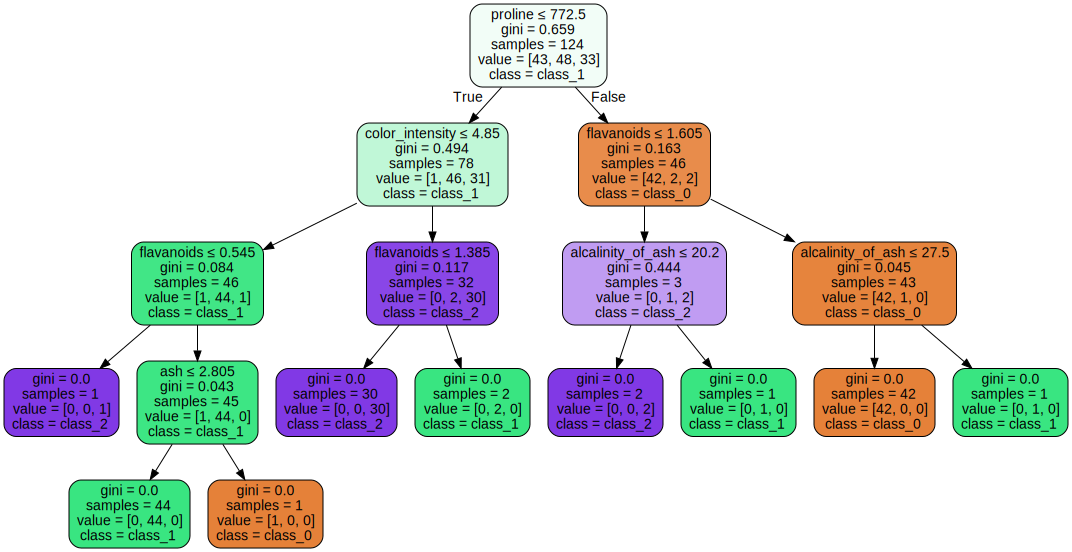

In [10]:
#Passing these traning vairables to Gini classifier and fitting the dataset
#plotting the Graph after fitting the dataset
from sklearn.tree import export_graphviz
import graphviz
clf_gini = tree.DecisionTreeClassifier(criterion = "gini")
clf_gini = clf_gini.fit(data_train, label_train)
gini_data = tree.export_graphviz(clf_gini, out_file=None, 
                         feature_names=Wine_Loaded.feature_names,  
                         class_names=Wine_Loaded.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
gini_graph = graphviz.Source(gini_data)  
gini_graph 
#Plotting the Gini Decision Tree as seen below
#Quality of each split in mentioned in the Root Box itself

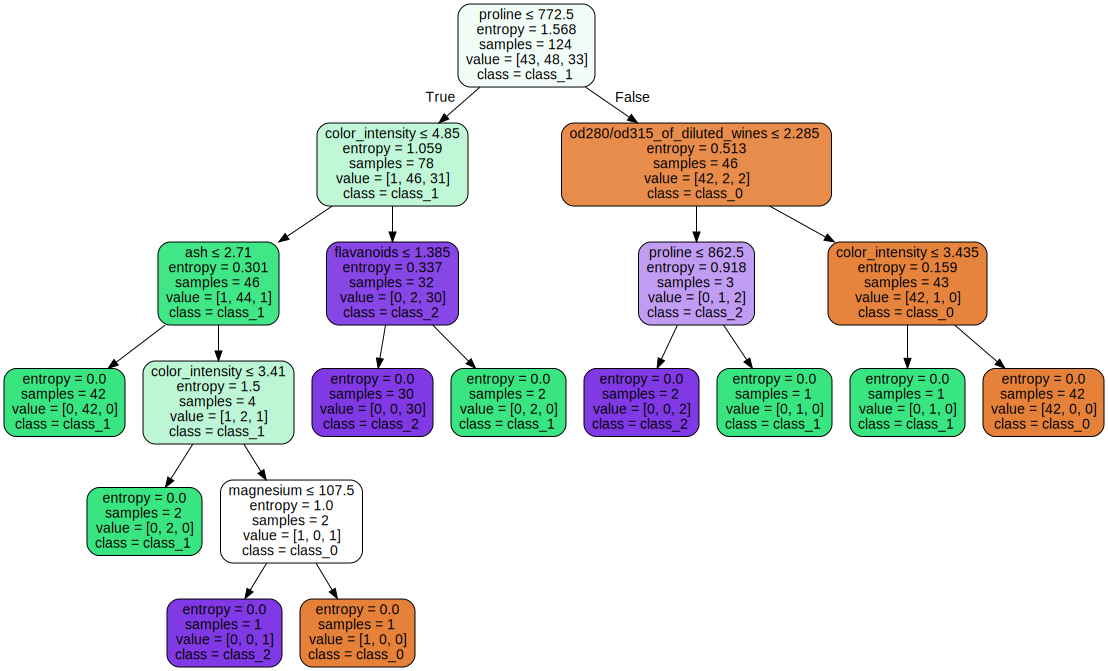

In [11]:
#Passing these traning vairables to Entropy classifier and fitting the dataset
#plotting the Graph after fitting the dataset
from sklearn.tree import export_graphviz
clf_entropy = tree.DecisionTreeClassifier(criterion = "entropy")
clf_entropy = clf_entropy.fit(data_train, label_train)
import graphviz
entropy_data = tree.export_graphviz(clf_entropy, out_file=None, 
                         feature_names=Wine_Loaded.feature_names,  
                         class_names=Wine_Loaded.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
entropy_graph = graphviz.Source(entropy_data)  
entropy_graph 
#Plotting the Entropy Decision Tree as seen below
#Quality of each split in mentioned in the Root Box itself

In [12]:
#Predicitng using the Gini Classifier
from sklearn.metrics import accuracy_score
predicted_gini = clf_gini.predict(data_test)
predicted_entropy = clf_entropy.predict(data_test)
Accuracy_Gini=accuracy_score(label_test,predicted_gini)*100
Accuracy_Entropy=accuracy_score(label_test,predicted_entropy)*100
print("Accuracy Gini,Entropy: " ,Accuracy_Gini,",",Accuracy_Entropy)

Accuracy Gini,Entropy:  77.77777777777779 , 77.77777777777779


In [13]:
#printing gini confusion martrix
#importing confusion_matrix for it
#printing precision_recall_fscore_support for Gini
#importing classification_report for it
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
y_pred_gini = clf_gini.fit(data_train, label_train).predict(data_test)
cnf_matrix = confusion_matrix(label_test, y_pred_gini)
print("Gini Confusion Matrix:\n", cnf_matrix)
#print("\nPrecision Recall Fscore and Support:\n",precision_recall_fscore_support(label_test, y_pred_gini, average=None))
print(classification_report(label_test, y_pred_gini, target_names=Wine_Loaded.target_names))

Gini Confusion Matrix:
 [[13  3  0]
 [ 3 20  0]
 [ 0  4 11]]
             precision    recall  f1-score   support

    class_0       0.81      0.81      0.81        16
    class_1       0.74      0.87      0.80        23
    class_2       1.00      0.73      0.85        15

avg / total       0.83      0.81      0.82        54



In [14]:
#printing entropy confusion martrix
#importing confusion_matrix for it
#printing precision_recall_fscore_support for Entropy
#importing classification_report for it
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
y_pred_entropy = clf_entropy.fit(data_train, label_train).predict(data_test)
cnf_matrix = confusion_matrix(label_test, y_pred_entropy)
print("Entropy Confusion Matrix:\n", cnf_matrix)
#print("\nPrecision Recall Fscore and Support:\n",precision_recall_fscore_support(label_test, y_pred_entropy, average=None))
print(classification_report(label_test, y_pred_entropy, target_names=Wine_Loaded.target_names))

Entropy Confusion Matrix:
 [[13  3  0]
 [ 1 21  1]
 [ 1  8  6]]
             precision    recall  f1-score   support

    class_0       0.87      0.81      0.84        16
    class_1       0.66      0.91      0.76        23
    class_2       0.86      0.40      0.55        15

avg / total       0.77      0.74      0.73        54

